# ファイル操作


## ファイルシステム
  　ファイル...保存先がなんであろうと同じようにアクセスでき、その裏で何が起きているのか意識しなくても扱えるもの

  　ストレージ...外部補助記憶装置とも呼ばれ、計算機のデータを長期間保存するためのデバイス。ブロック単位での保存を行うため、ブロックにラベルを付け管理している。

  　inode...どのブロックがどのファイルに所属しているのかを記録している

  　メタデータ...inodeが管理する「ファイル名」「所有者情報」「ファイルサイズ」を呼ぶ。ファイルの中身とメタデータを管理する場所を分け、効率的なフォルダ検索システムを構築

  　ファイルディスクリプタ...ＯＳにファイルへの接続要求があった場合、ファイルシステムに回線を用意するその回線を指す

  　遅延書き込み...一般的に書き込みは時間がかかり、実行完了後に作業を行うことは非効率であるため、事前にメモリを保持する方法がとられた。

## Colab上でのファイル操作


1. Google colab上でダウンロード
```
!wget (URL)
```
2. ファイルを開く、閉じる
- "r":読み取りモード(デフォルト)
- "w":書き込みモード
- "a":追記モード
- "t":テキストモード(デフォルト)
- "b":バイナリモード
```
f = open("(filename)","(option)")
f.close()
```
3. ファイルの書き込み
```
f=open("text.txt","w")
f.write("Hello World\n")
f.close()
```
4. 追記
```
f=open("text.txt","a")
f.write("This is the second line.\n")
f.close()
```
※注意
```
f=open("text.txt","w")
f.close()
```
これを行うと、ファイル内の文字が消えてしまうため注意が必要

5. ファイルの読み込み
- read:ファイルのを全てを一括して１つの文字列として認識する
- readlines:1行ごとに分割された文字列のリストを取得する
- readline:呼び出すたびに１行ずつ読み込む
- for文で回す方法←手っ取り早い
```
f=open("text.txt")
for line in f:
  print(line)
```
※上記の場合、改行が２つつながり、出力として1行おきに表示されてしまうので以下のように修正する
```
f=open("text.txt","w")
for line in f:
  print(line.rstrip())
```
6. with構文
　ファイルを開いた際に、閉じ忘れに注意する必要があるが、これを使えば問題ない。Pythonでは閉じ忘れ防止のため、with構文が用意されている
```
with open("text.txt") as f:
  # ファイルに関する処理
```

## CSVファイルの扱い

1. 開き方
```
with open("data.csv") as f:
  for line in f:
    #ここでlineにデータ行が入ってくる
```
splitを使用しばらばらにすることも可能
```
line = "1, 成績太郎, B"
id, name, grade = line.split(",")
id = int(id)
```
```
d_pop = {}
with open("population.csv") as f:
  for line in f:
    code, _ , pop=line.split(",")
    d_pop[int(code)] = int(pop)
```



## 課題1：人口地図の作成
1. ライブラリのインストール

In [1]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

2. データをダウンロード

In [3]:
!wget https://kaityo256.github.io/python_zero/file/popmap.zip

--2023-07-10 09:57:49--  https://kaityo256.github.io/python_zero/file/popmap.zip
Resolving kaityo256.github.io (kaityo256.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to kaityo256.github.io (kaityo256.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42400 (41K) [application/zip]
Saving to: ‘popmap.zip’

popmap.zip          100%[===================>]  41.41K  --.-KB/s    in 0.01s   

2023-07-10 09:57:49 (3.78 MB/s) - ‘popmap.zip’ saved [42400/42400]



3. データの展開
  
  　-oは、すでに同じ名前のファイルが存在する場いいでも上書きするオプション

In [4]:
!unzip -o popmap.zip

Archive:  popmap.zip
  inflating: population.csv          
  inflating: position.csv            


4. 人口データの確認

　左から「都市コード(CITY CODE)」「都道府県名or都市名」「人口」

In [5]:
!head population.csv

01000,北海道,5543556
01100,札幌市,1884939
01101,札幌市中央区,206252
01102,札幌市北区,273577
01103,札幌市東区,252688
01104,札幌市白石区,203579
01105,札幌市豊平区,208476
01106,札幌市南区,147397
01107,札幌市西区,209883
01108,札幌市厚別区,129604


5. 役所の位置データを確認

In [6]:
!head position.csv

01100,札幌市役所,43.06197200,141.35437400
01202,函館市役所,41.76871200,140.72910800
01203,小樽市役所,43.19075267,140.99460538
01204,旭川市役所,43.77079900,142.36479800
01205,室蘭市役所,42.31520400,140.97378400
01206,釧路市役所,42.98485600,144.38167000
01207,帯広市役所,42.92401400,143.19619500
01208,北見市役所,43.80782300,143.89438400
01209,夕張市役所,43.05681400,141.97406900
01210,岩見沢市役所,43.19616900,141.77585700


6. 人口データの辞書作成

In [11]:
d_pop = {}
with open("population.csv") as f:
  for line in f:
    code, _, pop=line.split(",")
    d_pop[int(code)] = int(pop)

7. 位置データの作成

In [14]:
data = []
with open("position.csv") as f:
  for line in f:
    a = line.strip().split(",")
    code, _, y, x = a
    code = int(code)
    x, y =float(x), float(y)
    if code in d_pop:
      data.append((x, y, d_pop[code]))

8. データのソート

In [15]:
data = sorted(data, key=lambda x:x[2])

9. 人口地図の描画

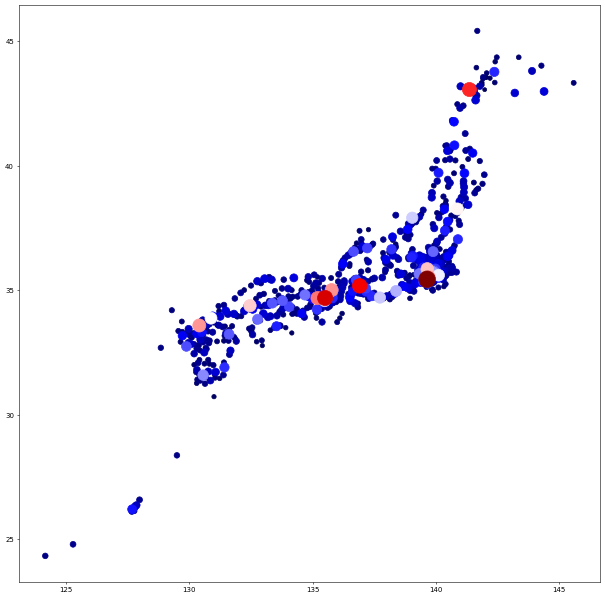

In [17]:
nx, ny, nn =[],[],[]
for x, y, n in data:
  nx.append(x)
  ny.append(y)
  nn.append(n**0.5*0.3)
plt.figure(figsize=(15,15),dpi=50)
plt.scatter(nx, ny, c=nn, s=nn, cmap=cm.seismic)

## 課題2：カラーテレビと平均寿命

1. ライブラリのインポート

In [26]:
import numpy as np
from matplotlib import pyplot as plt

2. テレビの普及率データのダウンロード

In [30]:
!wget https://kaityo256.github.io/python_zero/file/colortv.csv

--2023-07-10 10:25:12--  https://kaityo256.github.io/python_zero/file/colortv.csv
Resolving kaityo256.github.io (kaityo256.github.io)... 185.199.110.153, 185.199.108.153, 185.199.111.153, ...
Connecting to kaityo256.github.io (kaityo256.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162 [text/csv]
Saving to: ‘colortv.csv.4’

colortv.csv.4       100%[===================>]     162  --.-KB/s    in 0s      

2023-07-10 10:25:12 (6.92 MB/s) - ‘colortv.csv.4’ saved [162/162]



3. テレビの普及率のデータの確認

In [31]:
!head colortv.csv.4

1966,0.3
1967,1.6
1968,5.4
1969,13.9
1970,26.3
1971,42.3
1972,61.1
1973,75.8
1974,85.9
1975,90.3


4. テレビの普及率のプロット

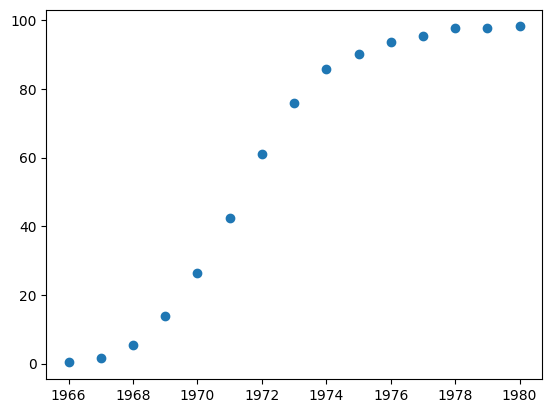

In [33]:
tv_year=[]
tv_data=[]
with open("colortv.csv.4") as f:
  for line in f:
    y, d = line.split(",")
    tv_year.append(int(y))
    tv_data.append(float(d))
plt.scatter(tv_year, tv_data)

5. 平均寿命データのダウンロード

In [34]:
!wget https://kaityo256.github.io/python_zero/file/lifespan.csv

--2023-07-10 10:29:53--  https://kaityo256.github.io/python_zero/file/lifespan.csv
Resolving kaityo256.github.io (kaityo256.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to kaityo256.github.io (kaityo256.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178 [text/csv]
Saving to: ‘lifespan.csv’

lifespan.csv        100%[===================>]     178  --.-KB/s    in 0s      

2023-07-10 10:29:53 (9.26 MB/s) - ‘lifespan.csv’ saved [178/178]



6. 平均寿命データの確認

In [35]:
!head lifespan.csv

1966,68.35
1967,68.91
1968,69.05
1969,69.18
1970,69.31
1971,70.17
1972,70.5
1973,70.7
1974,71.16
1975,71.73


7. 平均寿命をプロット

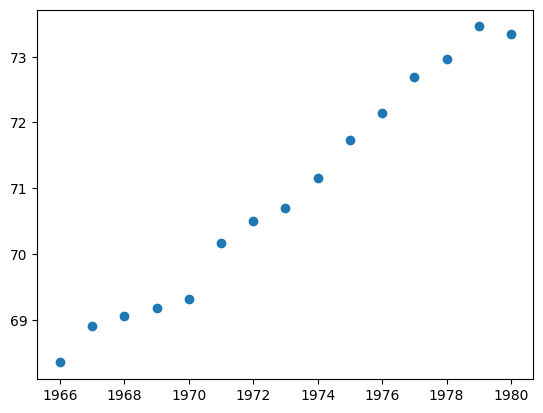

In [36]:
life_year=[]
life_data=[]
with open("lifespan.csv") as f:
  for line in f:
    y, d = line.split(",")
    life_year.append(int(y))
    life_data.append(float(d))
plt.scatter(life_year, life_data)

## 発展問題：テレビの普及率と寿命の関係

8. テレビの普及率と寿命の関係

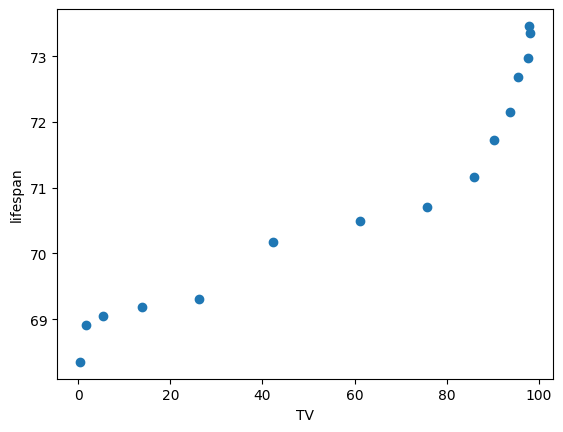

In [37]:
plt.xlabel("TV")
plt.ylabel("lifespan")
plt.scatter(tv_data, life_data)

9. テレビの普及率と寿命の相関係数

　numpyのcorrcoef()関数で調べる

In [39]:
np.corrcoef(tv_data, life_data)

array([[1.        , 0.94816361],
       [0.94816361, 1.        ]])